<a href="https://colab.research.google.com/github/thuBv-123/Bui-Vu-Anh-Thu--31241025695--LT0001/blob/main/Bai%206.2%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install scikit-fuzzy

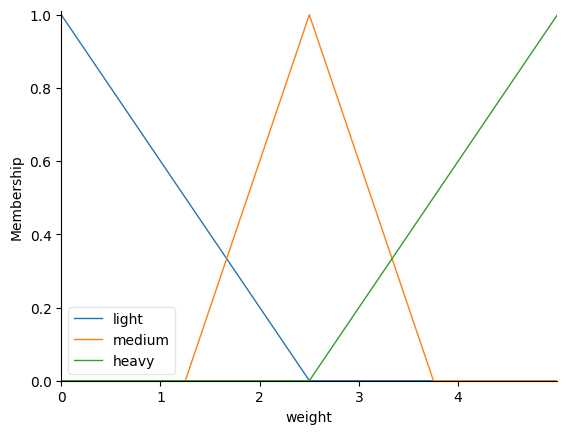

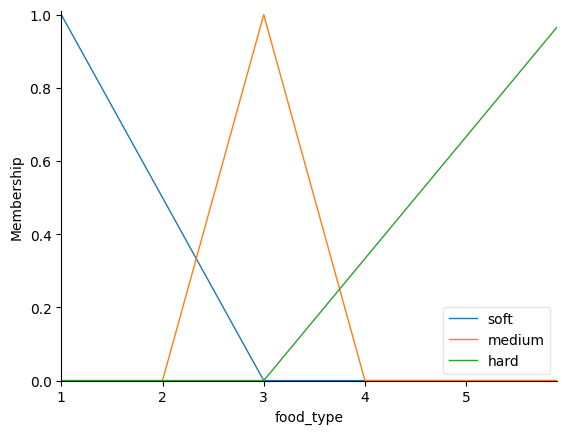

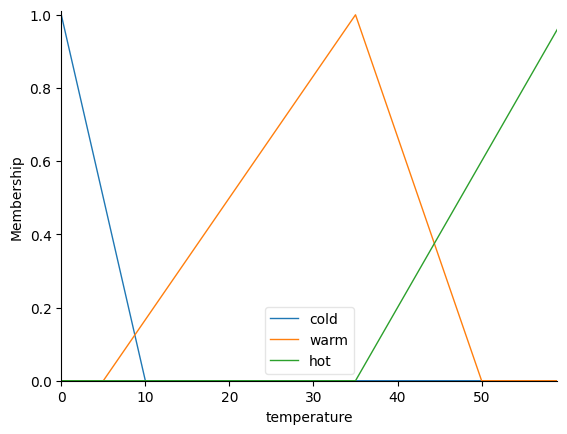

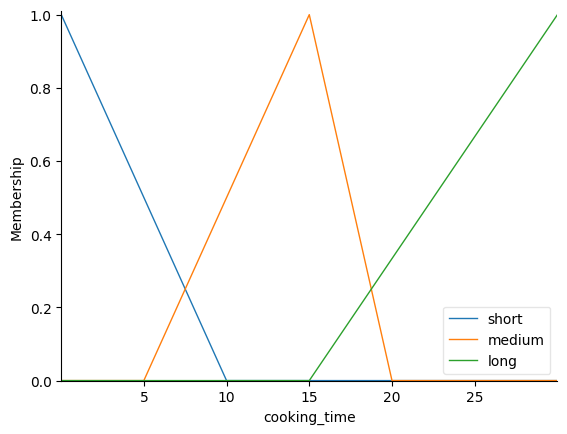

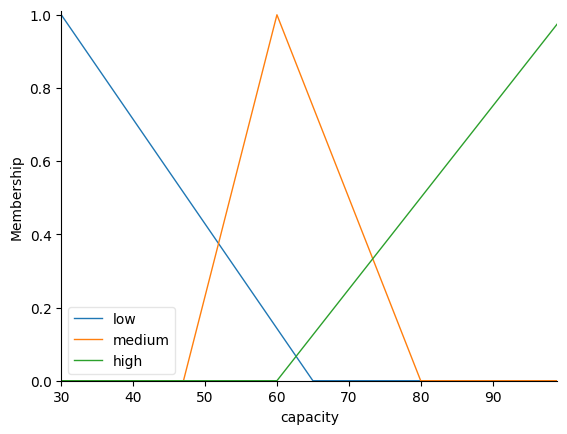

In [15]:
#exam 5

import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl


weight=ctrl.Antecedent(np.arange(0,5,0.001),'weight')
food_type=ctrl.Antecedent(np.arange(1,6,0.1),'food_type')
temperature=ctrl.Antecedent(np.arange(0,60,1),'temperature')
cooking_time=ctrl.Consequent(np.arange(0.01,30,0.01),'cooking_time')
capacity=ctrl.Consequent(np.arange(30,100,1),'capacity')


weight['light']=fuzzy.trimf(weight.universe,[0,0,2.5])
weight['medium']=fuzzy.trimf(weight.universe,[1.25,2.5,3.75])
weight['heavy']=fuzzy.trimf(weight.universe,[2.5,5,5])
food_type['soft']=fuzzy.trimf(food_type.universe,[1,1,3])
food_type['medium']=fuzzy.trimf(food_type.universe,[2,3,4])
food_type['hard']=fuzzy.trimf(food_type.universe,[3,6,6])
temperature['cold']=fuzzy.trimf(temperature.universe,[0,0,10])
temperature['warm']=fuzzy.trimf(temperature.universe,[5,35,50])
temperature['hot']=fuzzy.trimf(temperature.universe,[35,60,60])
cooking_time['short']=fuzzy.trimf(cooking_time.universe,[0.01,0.01,10])
cooking_time['medium']=fuzzy.trimf(cooking_time.universe,[5,15,20])
cooking_time['long']=fuzzy.trimf(cooking_time.universe,[15,30,30])
capacity['low']=fuzzy.trimf(capacity.universe,[30,30,65])
capacity['medium']=fuzzy.trimf(capacity.universe,[47,60,80])
capacity['high']=fuzzy.trimf(capacity.universe,[60,100,100])


weight.view()
food_type.view()
temperature.view()
cooking_time.view()
capacity.view()




9.343056135974148
41.66666666666665


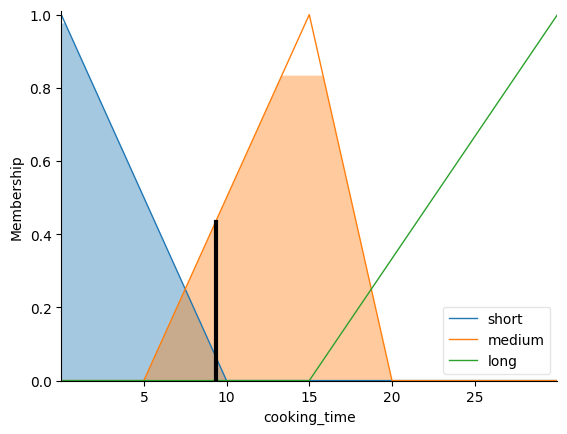

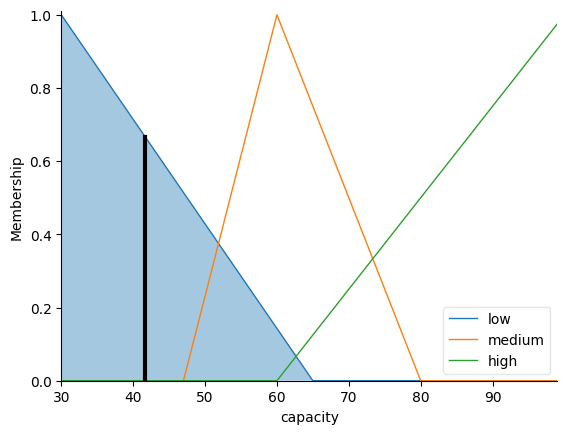

In [16]:
rule1=ctrl.Rule(weight['light'],cooking_time['short'])
rule2=ctrl.Rule(weight['medium'],cooking_time['medium'])
rule3=ctrl.Rule(weight['heavy'],cooking_time['long'])
rule4=ctrl.Rule(food_type['soft'],capacity['low'])
rule5=ctrl.Rule(food_type['medium'],capacity['medium'])
rule6=ctrl.Rule(food_type['hard'],capacity['high'])
rule7=ctrl.Rule(temperature['cold'],cooking_time['long'])
rule8=ctrl.Rule(temperature['warm'],cooking_time['medium'])
rule9=ctrl.Rule(temperature['hot'],cooking_time['short'])
rule10=ctrl.Rule(weight['heavy']&food_type['hard']&temperature['cold'],(cooking_time['long'],capacity['high']))
rule11=ctrl.Rule(weight['medium']&food_type['soft']&temperature['warm'],(cooking_time['medium'],capacity['low']))
rule12=ctrl.Rule(weight['light']&food_type['medium']&temperature['hot'],(cooking_time['short'],capacity['medium']))




cooking_time_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
time=ctrl.ControlSystemSimulation(cooking_time_ctrl)
time.input['weight']=0.06
time.input['food_type']=1
time.input['temperature']=30
time.compute()
print(time.output['cooking_time'])
print(time.output['capacity'])
cooking_time.view(sim=time)
capacity.view(sim=time)


